# AIList benchmarks

Here we will show you how to benchmark the code. We assume you have already finished the introduction and have compiled and put the `ailist` executable in your path.

We also included implementations of 2 other data structures, the NCList (obtained from [ncls](https://github.com/hunt-genes/ncls)), and the AITree (obtained from [kerneltree](https://github.com/biocore-ntnu/kerneltree/)). Here is how to compile these tools:

In [11]:
cd
cd AIList/src_AITree
make
#sudo cp AITree /usr/local/bin aitree

make: Nothing to be done for 'all'.


In [12]:
cd ../src_NCList
gcc -o NCList intervaldb.c
#sudo cp NCList /usr/local/bin nclist

In [13]:
cd
time ./AIList/bin/ailist AIListTestData/chainOrnAna1.bed AIListTestData/exons.bed | head

chr1	11871	25924	13
chr1	14786	15089	2
chr1	16586	17305	3
chr1	17962	18067	1
chr1	18118	18426	1
chr1	19159	24916	1
chr1	24680	24904	1
chr1	29183	29815	1
chr1	49736	63898	0
chr1	52067	70851	1

real	0m0.929s
user	0m0.909s
sys	0m0.023s


In [14]:
cd
time ./AIList/src_AITree/AITree AIListTestData/chainOrnAna1.bed AIListTestData/exons.bed | head

chr1	11871	25924	13
chr1	14786	15089	2
chr1	16586	17305	3
chr1	17962	18067	1
chr1	18118	18426	1
chr1	19159	24916	1
chr1	24680	24904	1
chr1	29183	29815	1
chr1	49736	63898	0
chr1	52067	70851	1

real	0m1.397s
user	0m1.370s
sys	0m0.029s


In [15]:
cd 
time ./AIList/src_NCList/NCList AIListTestData/chainOrnAna1.bed AIListTestData/exons.bed | head

chr1	11871	25924	13
chr1	14786	15089	2
chr1	16586	17305	3
chr1	17962	18067	1
chr1	18118	18426	1
chr1	19159	24916	1
chr1	24680	24904	1
chr1	29183	29815	1
chr1	49736	63898	0
chr1	52067	70851	1

real	0m1.231s
user	0m1.217s
sys	0m0.015s


In [16]:
time bedtools intersect -c -a AIListTestData/chainOrnAna1.bed -b AIListTestData/exons.bed | head

chr1	11871	25924	13
chr1	14786	15089	2
chr1	16586	17305	3
chr1	17962	18067	1
chr1	18118	18426	1
chr1	19159	24916	1
chr1	24680	24904	1
chr1	29183	29815	1
chr1	49736	63898	0
chr1	52067	70851	1

real	0m1.852s
user	0m1.798s
sys	0m0.057s


Now, here is how to reproduce the benchmark figures from the paper

## Benchmark code

Now, download some test data for our benchmarks:

In [7]:
cd
wget http://big.databio.org/example_data/sailer/AIListTestData.tgz
tar -xf AIListTestData.tgz

--2019-01-15 15:16:35--  http://big.databio.org/example_data/sailer/AIListTestData.tgz
Resolving big.databio.org (big.databio.org)... 128.143.8.170
Connecting to big.databio.org (big.databio.org)|128.143.8.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409879540 (391M) [application/octet-stream]
Saving to: ‘AIListTestData.tgz’

AIListTestData.tgz  100%[===================>] 390.89M  16.2MB/s    in 32s     

2019-01-15 15:17:07 (12.0 MB/s) - ‘AIListTestData.tgz’ saved [409879540/409879540]



In [1]:
cd
cd AIListTestData
mkdir data
touch data/fig2a
touch data/fig2b
touch data/fig2c
touch data/fig2d
pwd

/home/john/AIListTestData


In [5]:
#The bash-kernel (in python) is very slow for benchmarks. Code shown here should be run on command line, 
# or using magic commands of jupyter notebook. The following code uses magic commands, so be sure to
# switch Kernel to Python 3 before execute it!!!
import cv2
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%cd 
%cd AIListTestData

/home/john
/home/john/AIListTestData


In [7]:
%%bash
#code here runs ~2hrs
echo -e "real\tuser\tsys" > data/fig2a
echo -e "real\tuser\tsys" > data/fig2b
echo -e "real\tuser\tsys" > data/fig2c
echo -e "real\tuser\tsys" > data/fig2d
for i in {5..150..5}
do
/usr/bin/time -a -o data/fig2a -f "%e\t%U\t%S" ailist chainRn4.bed chainOrnAna1.bed -L $i > /dev/null
/usr/bin/time -a -o data/fig2b -f "%e\t%U\t%S" ailist chainRn4.bed chainVicPac2.bed -L $i > /dev/null
/usr/bin/time -a -o data/fig2c -f "%e\t%U\t%S" ailist chainRn4.bed chainXenTro3Link.bed -L $i > /dev/null
/usr/bin/time -a -o data/fig2d -f "%e\t%U\t%S" ailist chainRn4.bed chainMonDom5Link.bed -L $i > /dev/null
done

Process is terminated.


In [8]:
def clenCurve():
    d_a = pd.read_csv("data/fig2a", sep='\t')    
    d_b = pd.read_csv("data/fig2b", sep='\t')  
    d_c = pd.read_csv("data/fig2c", sep='\t')    
    d_d = pd.read_csv("data/fig2d", sep='\t')      
    #--------------------------------------------------
    tx1 = np.arange(5, 255, 5)
    
    t1 = d_a['real']
    t2 = d_b['real'] 
    t3 = d_c['real']
    t4 = d_d['real']    
    r1 = t1[3]
    r2 = t2[3]
    r3 = t3[3]
    r4 = t4[3]
    
    #--------------------------------------------------
    f = plt.figure(1, figsize=(6,4))
    ax1 = plt.subplot(111)  
    plt.xlabel('Minimum length of coverage')
    plt.ylabel('Runtime ratio')    
    ax1.set_ylim(0.8, 2.0)
    ax1.set_xlim(0, 150)
    
    plt.plot(tx1, t1/r1, ':', label='Dataset 3', color='k')    
    plt.plot(tx1, t2/r2, '-.', label='Dataset 4', color='0.5')
    plt.plot(tx1, t3/r3, '-', label='Dataset 5', color='0.3')    
    plt.plot(tx1, t4/r4, '--', label='Dataset 6', color='k')  
    ax1.legend(loc='upper right')
    
    plt.show()
    f.savefig('data/ailist_fig2.svg')

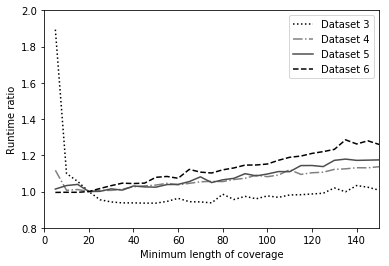

In [9]:
clenCurve()

Here is additional code that will run meaningful benchmarks on these larger datasets: